Problem Formulation
The goal of this project is to build a machine learning model that can accurately predict whether a loan application will be approved or not. Given a set of loan application data, including information about the applicant's income, employment history, credit score, and loan amount, the model will be able to determine the likelihood of loan approval. The problem can be framed as a binary classification task, where the target variable is a binary outcome indicating whether the loan application was approved (1) or not (0). The model was trained on a historical dataset of loan applications and their outcomes. The performance of the model will be evaluated based on its ability to accurately predict loan approval on a held-out test dataset. The primary metric used for evaluation will be the accuracy of the model, but other metrics such as precision, recall, and F1 score may also be considered. The ultimate goal is to develop a model that can be used by financial institutions to make informed decisions about loan approvals, reducing the risk of default and improving the overall loan process for applicants.

# Packages and Data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import os
%matplotlib inline


# Hide warnings returned by cross validation.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Specify the directory path where your data files are located
df_train = pd.read_csv(r'C:\Users\Engr. Moji\Desktop\ML tasks\Loan prediction\loan-train.csv')
df_test = pd.read_csv(r'C:\Users\Engr. Moji\Desktop\ML tasks\Loan prediction\loan-test.csv')


In [3]:
# Display first five elements of the test dataset
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Preprocessing

In [4]:
df_train.shape

(614, 13)

In [5]:
df_test.shape

(367, 12)

In [6]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


In [8]:
# Get columns with missing values
columns_with_missing = df_train.isnull().sum()
print(columns_with_missing)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [9]:
# Fill missing values with the most frequent value in each column
df_train = df_train.apply(lambda x: x.fillna(x.value_counts().idxmax()))
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
# Drop irrelevant column
df_train= df_train.drop('Loan_ID', axis =1)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
# Check for duplicates
df_train.duplicated().sum()

0

In [13]:
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_no_outliers

# Apply the remove_outliers_iqr function to 'ApplicantIncome' by 'Loan_Status'
df_train = df_train.groupby('Loan_Status').apply(lambda x: remove_outliers_iqr(x, 'ApplicantIncome')).reset_index(drop=True)
df_train.shape

(563, 12)

In [14]:
#Identify categorical and numeric columns
categorical_columns = df_train.select_dtypes(include=['object']).columns
numeric_columns = df_train.select_dtypes(include=['number']).columns

# Get the categorical data from the DataFrame
categorical_data = df_train[categorical_columns]

# Perform label encoding

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()

encoded_df = categorical_data.copy()
for column in categorical_data.columns:
    encoded_df[column] = label_encoder.fit_transform(categorical_data[column])
    

print("\nLabel Encoded Data:")
print(encoded_df)



Label Encoded Data:
     Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0         1        1           1          0              0              0   
1         1        1           3          0              0              1   
2         1        0           0          0              0              0   
3         0        0           0          0              0              2   
4         1        1           0          1              0              0   
..      ...      ...         ...        ...            ...            ...   
558       1        1           0          0              0              0   
559       0        0           0          0              0              0   
560       1        1           3          0              0              0   
561       1        1           1          0              0              2   
562       1        1           2          0              0              2   

     Loan_Status  
0              0  
1              0

In [15]:
# Concatenate the encoded DataFrame with the original numeric data
# Get the numeric data from the DataFrame
numeric_data = df_train[numeric_columns]

train_df = pd.concat([encoded_df, numeric_data], axis=1)

# Display the combined DataFrame
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,1,0,0,0,0,4583,1508.0,128.0,360.0,1.0
1,1,1,3,0,0,1,0,3036,2504.0,158.0,360.0,0.0
2,1,0,0,0,0,0,0,1853,2840.0,114.0,360.0,1.0
3,0,0,0,0,0,2,0,3510,0.0,76.0,360.0,0.0
4,1,1,0,1,0,0,0,4887,0.0,133.0,360.0,1.0


# Exploratory Data Analysis

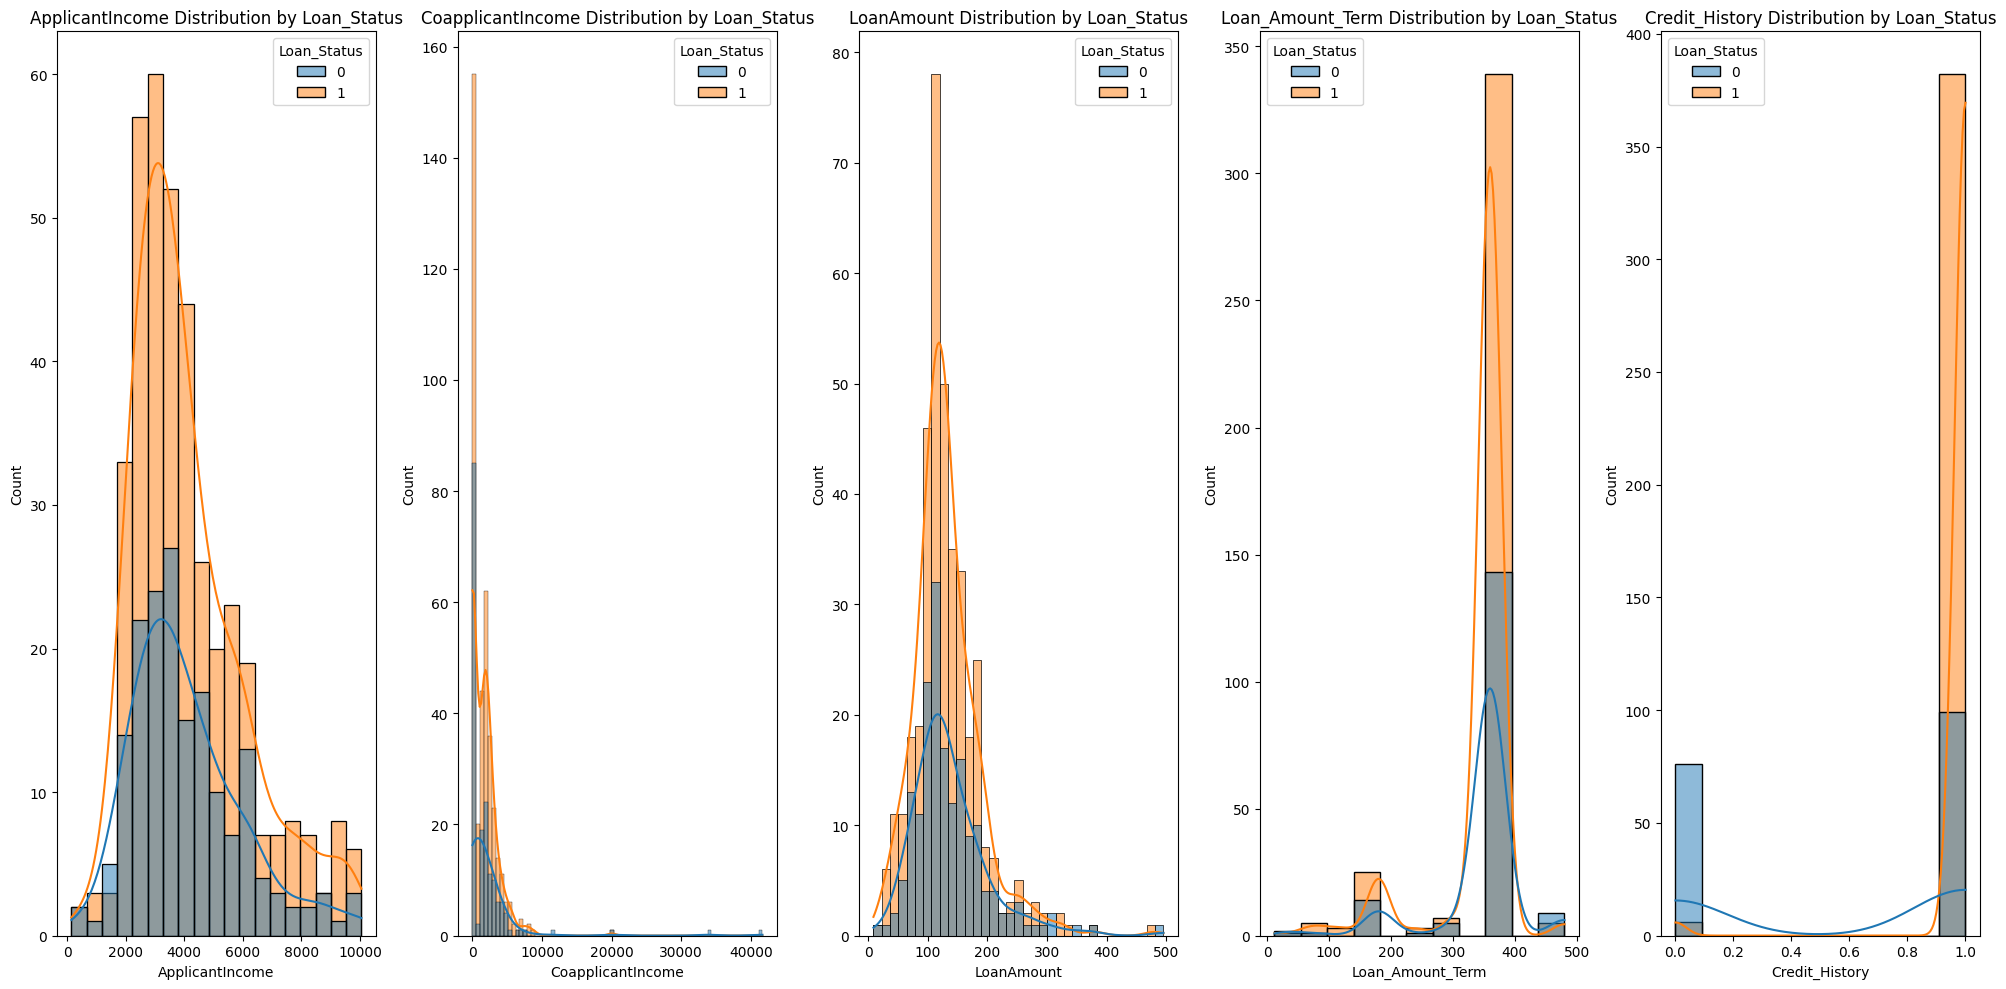

In [16]:
# Visualize the distribution of numeric features based on Loan_Status
# Status: Yes= 1, No =0
plt.figure(figsize=(20, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.histplot(data=train_df, x=column, hue='Loan_Status', kde=True)
    plt.title(f'{column} Distribution by Loan_Status')

plt.tight_layout()
plt.show()

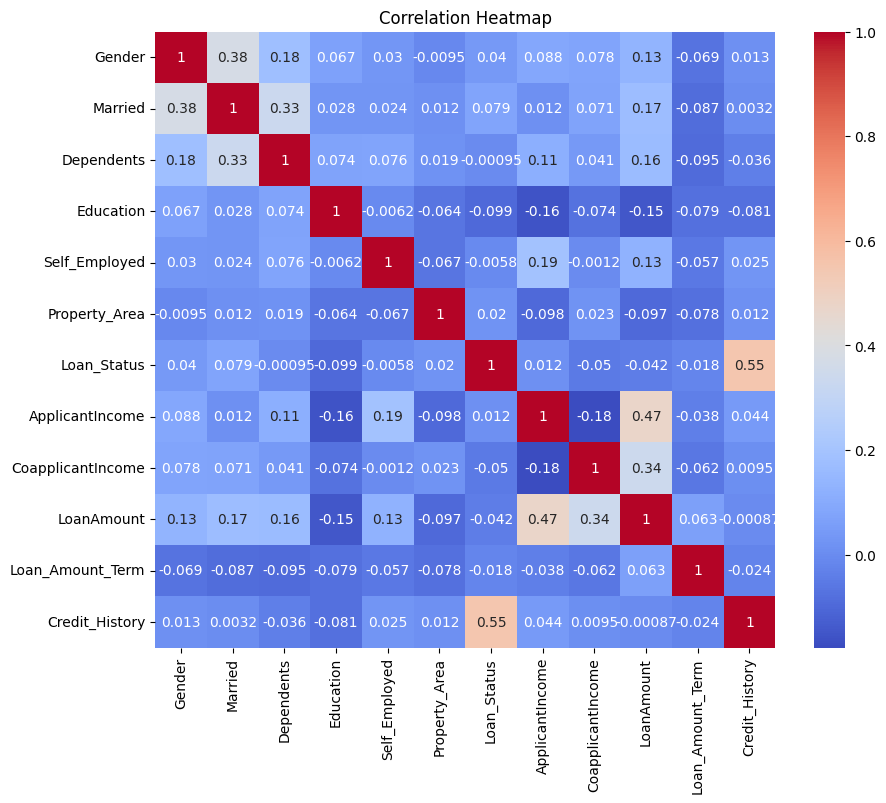

In [17]:
# Correlation heatmap
correlation_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


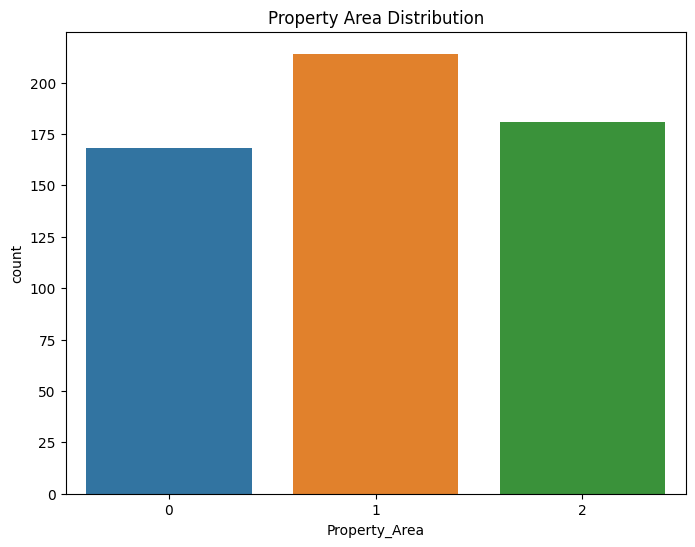

In [18]:
# Count plot for property area
# Urban =2, Semi-urban  = 1, Rural = 0
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', data=train_df)
plt.title('Property Area Distribution')
plt.show()

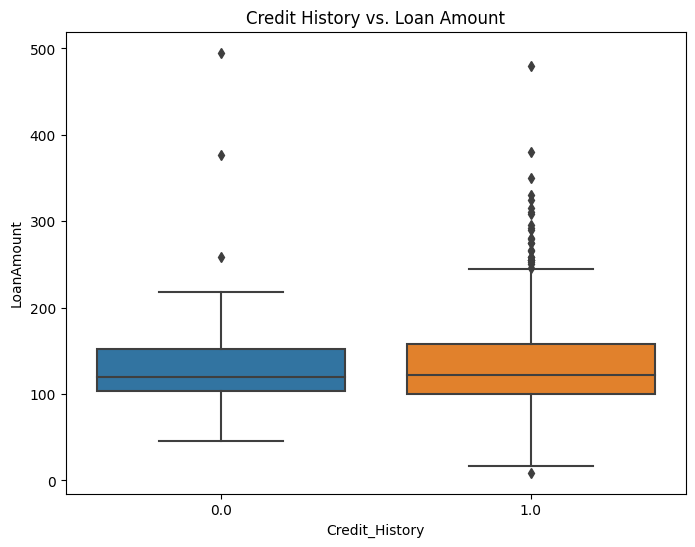

In [19]:
# Box plot for credit history vs. loan amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit_History', y='LoanAmount', data=train_df)
plt.title('Credit History vs. Loan Amount')
plt.show()

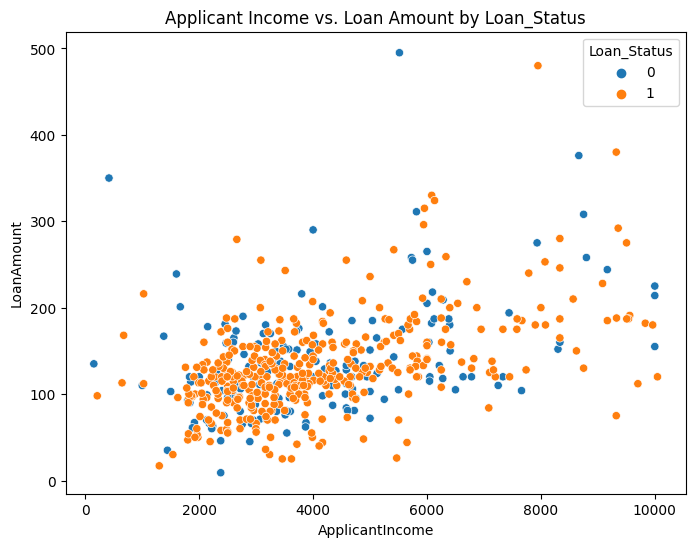

In [20]:
# Scatter plot between applicant income and loan amount by Loan_Status
# Status: Yes= 1, No =0
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title('Applicant Income vs. Loan Amount by Loan_Status')
plt.show()

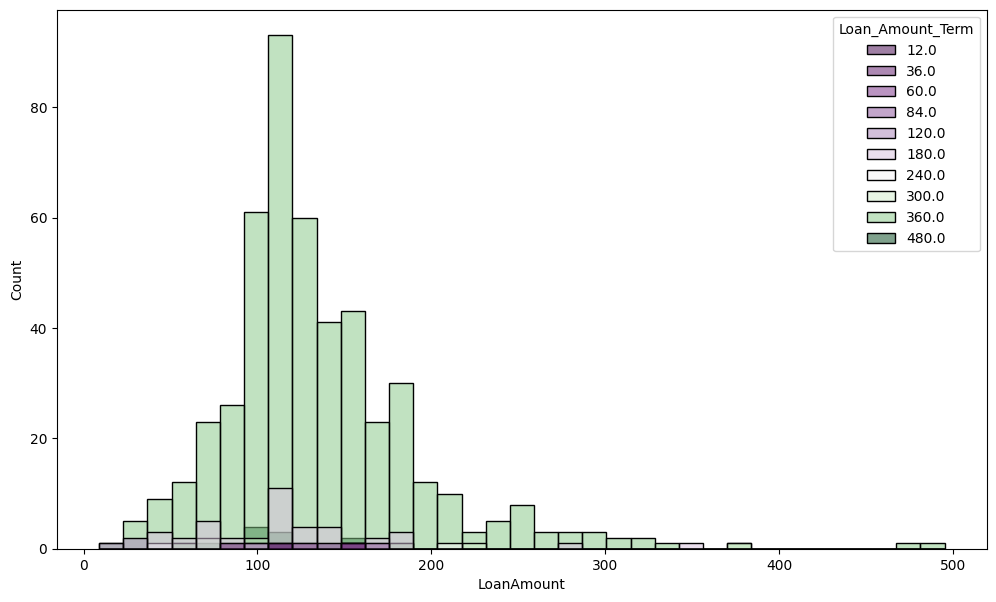

In [21]:
# Create a histogram plot to visualize the distribution of 'LoanAmount'
# for different 'Loan_Amount_Term' categories 
plt.figure(figsize=(12,7))

sns.histplot(data=train_df, x='LoanAmount', palette='PRGn', hue='Loan_Amount_Term')
plt.show()

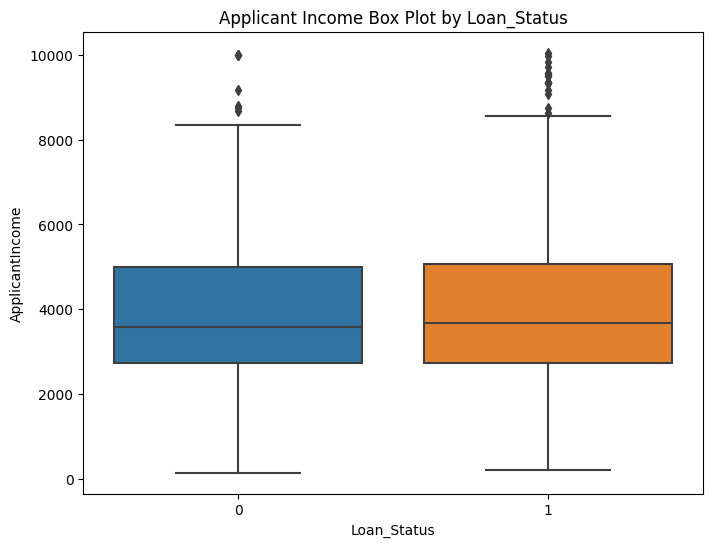

In [22]:
# Box plot for applicant income to detect outliers by Loan_Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df, x='Loan_Status', y='ApplicantIncome')
plt.title('Applicant Income Box Plot by Loan_Status')
plt.show()

# Feauture Selection

In [23]:
# Select "Loan_Status" as the target variable (dependent variable)
target = train_df['Loan_Status']

# Select the remaining columns as features (independent variables)
features = train_df.drop(columns=['Loan_Status'])


# Training Ensemble Classifiers

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

# Create individual classifiers
log_classifier =  LogisticRegression(random_state=42)
sv_classifier = SVC(kernel= "poly", probability=True, random_state=42)
sgd_classifier = SGDClassifier()
tree_clf = DecisionTreeClassifier(random_state=42)
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
knn_clf = KNeighborsClassifier()
gauss_clf =GaussianNB()

In [25]:
# Create an ensemble classifier using VotingClassifier
from sklearn.ensemble import VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('log_reg', log_classifier),
        ('svc', sv_classifier),
        ('sgd', sgd_classifier),
        ('tree', tree_clf),
        ('random', forest_clf),
        ('neiighbor', knn_clf),
        ('gauss', gauss_clf)
    ],
    voting='hard'  # 'hard' or 'soft' voting strategy
)

In [26]:
# Train the ensemble classifier
ensemble_classifier.fit(features, target)



VotingClassifier(estimators=[('log_reg', LogisticRegression(random_state=42)),
                             ('svc',
                              SVC(kernel='poly', probability=True,
                                  random_state=42)),
                             ('sgd', SGDClassifier()),
                             ('tree', DecisionTreeClassifier(random_state=42)),
                             ('random',
                              RandomForestClassifier(random_state=42)),
                             ('neiighbor', KNeighborsClassifier()),
                             ('gauss', GaussianNB())])

# Model Evaluation

In [27]:
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 3 

# Create a KFold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation on your ensemble classifier
cv_scores = cross_val_score(ensemble_classifier, features, target, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the scores
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")


Cross-Validation Scores: [0.78723404 0.81382979 0.82887701]
Mean Accuracy: 0.81
Standard Deviation: 0.02


In [28]:
# Make predictions on the training data
y_train_pred = ensemble_classifier.predict(features)

In [29]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(target, y_train_pred)
report = classification_report(target, y_train_pred)

print(f'Ensemble Classifier Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(report)

Ensemble Classifier Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.54      0.70       175
           1       0.83      1.00      0.90       388

    accuracy                           0.85       563
   macro avg       0.91      0.77      0.80       563
weighted avg       0.88      0.85      0.84       563

